<a href="https://colab.research.google.com/github/pranshudatascience/Celeb-Face-Shape-Classification/blob/main/Face_Shape_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"datasciencepranshu","key":"f206fef76574e388b3dba86a1861be62"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d niten19/face-shape-dataset

 98% 625M/639M [00:05<00:00, 117MB/s]
100% 639M/639M [00:05<00:00, 116MB/s]


In [5]:
from zipfile import ZipFile
file_name = "face-shape-dataset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
#Give dataset path
train_path = '/content/FaceShape Dataset/training_set'
test_path = '/content/FaceShape Dataset/testing_set'

In [8]:
folders = glob('/content/FaceShape Dataset/testing_set/*')
len(folders)

5

In [9]:
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

234553344/234545216 [==============================] - 1s 0us/step


In [10]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=5, activation='softmax')(x)
model = Model(ResNet_model.input, output)


model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test dataset

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/FaceShape Dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4000 images belonging to 5 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/FaceShape Dataset/testing_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 5 classes.


In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
125/125 [==============================] - 107s 857ms/step - loss: 1.4489 - accuracy: 0.3792 - val_loss: 1.8894 - val_accuracy: 0.4020
Epoch 2/20
125/125 [==============================] - 106s 851ms/step - loss: 1.2846 - accuracy: 0.4818 - val_loss: 1.3817 - val_accuracy: 0.4210
Epoch 3/20
125/125 [==============================] - 107s 856ms/step - loss: 1.1531 - accuracy: 0.5420 - val_loss: 1.4063 - val_accuracy: 0.4750
Epoch 4/20
125/125 [==============================] - 106s 847ms/step - loss: 1.0770 - accuracy: 0.5830 - val_loss: 1.5028 - val_accuracy: 0.4970
Epoch 5/20
125/125 [==============================] - 106s 845ms/step - loss: 1.0046 - accuracy: 0.6195 - val_loss: 1.3049 - val_accuracy: 0.5270
Epoch 6/20
125/125 [==============================] - 107s 857ms/step - loss: 0.9231 - accuracy: 0.6522 - val_loss: 1.3139 - val_accuracy: 0.5380
Epoch 7/20
125/125 [==============================] - 108s 865ms/step - loss: 0.8480 - accuracy: 0.6802 - val_loss: 1.3843 -

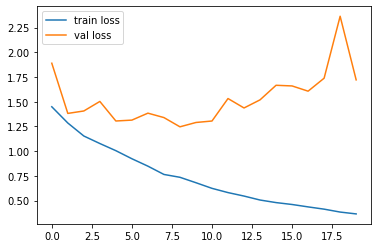

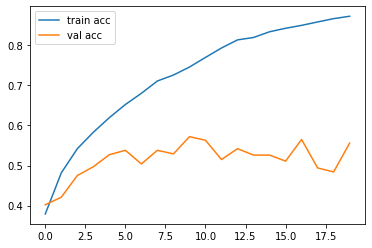

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model

model.save('modelface_resNet.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [20]:
y_pred = model.predict(test_set)

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([4, 2, 4, 2, 4, 0, 4, 0, 0, 4, 1, 3, 0, 4, 1, 3, 2, 2, 4, 1, 1, 1,
       2, 4, 0, 2, 3, 0, 3, 4, 3, 1, 0, 2, 4, 0, 3, 4, 0, 0, 1, 1, 3, 4,
       2, 2, 4, 1, 0, 4, 3, 4, 2, 2, 1, 2, 2, 3, 0, 1, 1, 0, 2, 4, 2, 1,
       1, 2, 2, 3, 4, 4, 0, 4, 0, 0, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 3, 0,
       1, 0, 0, 2, 0, 4, 4, 2, 3, 1, 3, 2, 2, 2, 0, 4, 4, 1, 4, 4, 0, 2,
       2, 2, 2, 1, 1, 3, 4, 0, 1, 2, 4, 1, 0, 1, 4, 4, 0, 2, 1, 4, 4, 0,
       4, 4, 0, 0, 4, 2, 0, 4, 2, 0, 0, 1, 1, 2, 0, 0, 4, 3, 4, 4, 4, 0,
       2, 0, 3, 2, 4, 4, 2, 0, 0, 4, 3, 1, 4, 3, 1, 1, 0, 4, 3, 0, 3, 3,
       4, 4, 4, 3, 2, 0, 4, 4, 4, 4, 2, 4, 0, 1, 4, 0, 4, 3, 0, 1, 2, 2,
       3, 2, 0, 3, 2, 2, 0, 2, 4, 3, 2, 0, 0, 4, 1, 4, 1, 2, 4, 4, 0, 3,
       4, 2, 1, 2, 2, 4, 1, 1, 1, 4, 4, 0, 3, 1, 1, 0, 1, 0, 4, 0, 1, 2,
       3, 4, 0, 4, 4, 4, 3, 4, 1, 2, 2, 4, 3, 0, 0, 2, 1, 3, 2, 1, 1, 1,
       3, 2, 3, 3, 4, 3, 3, 0, 4, 4, 2, 4, 4, 3, 2, 0, 3, 4, 3, 0, 0, 3,
       0, 1, 2, 2, 0, 2, 4, 0, 2, 4, 4, 4, 3, 3, 2,

In [38]:
def predict_face(img):
    plt.figure(figsize=(40,8))
    print()
    print('----------Face Shape Prediction----------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])

In [39]:
classes=["Heart Shaped Face", "Oblong Shaped Face","Oval Faced Shape","Round Shaped Face","Square Shaped Face"]


----------Face Shape Prediction----------

Heart Shaped Face


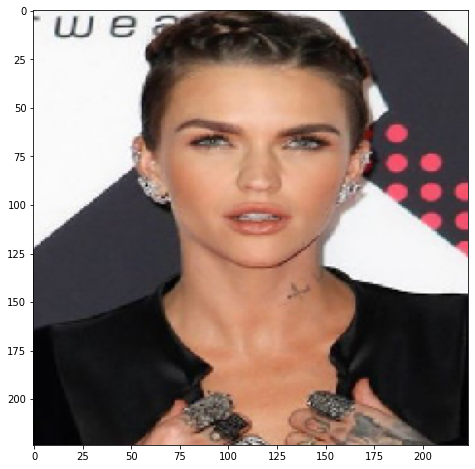

In [40]:
im=image.load_img('/content/FaceShape Dataset/testing_set/Heart/heart (102).jpg',target_size=(224,224))
predict_face(im)


----------Face Shape Prediction----------

Oblong Shaped Face


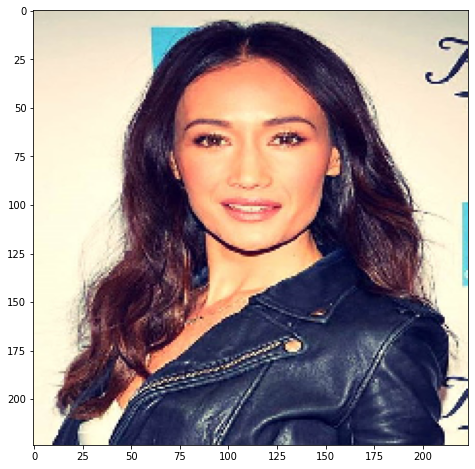

In [41]:
im2=image.load_img('/content/FaceShape Dataset/testing_set/Oblong/oblong (14).jpg',target_size=(224,224))
predict_face(im2)


----------Face Shape Prediction----------

Square Shaped Face


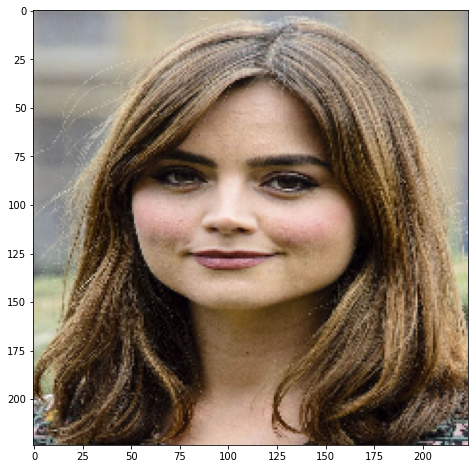

In [42]:
im3=image.load_img('/content/FaceShape Dataset/testing_set/Square/square (151).jpg',target_size=(224,224))
predict_face(im3)


----------Face Shape Prediction----------

Square Shaped Face


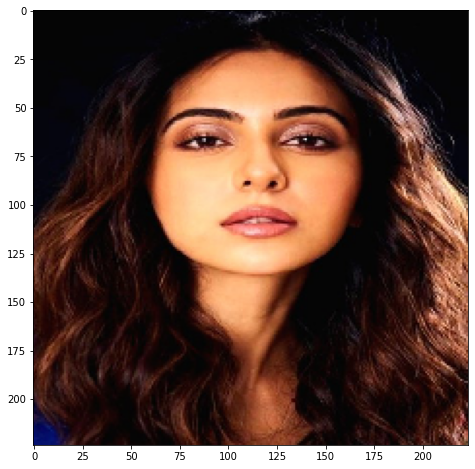

In [43]:
im4=image.load_img('/content/FaceShape Dataset/testing_set/Round/round (162).jpg',target_size=(224,224))
predict_face(im4)


----------Face Shape Prediction----------

Heart Shaped Face


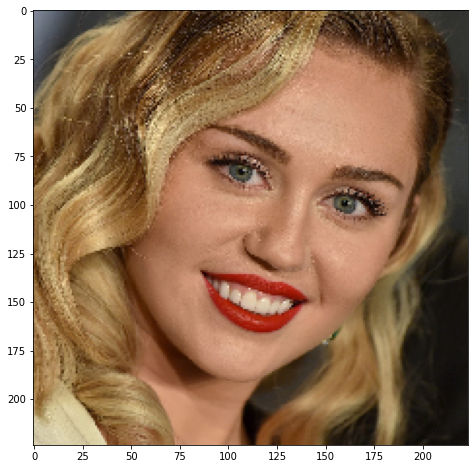

In [44]:

im5=image.load_img('/content/FaceShape Dataset/testing_set/Heart/heart (138).jpg',target_size=(224,224))
predict_face(im5)